## Synthetic

Some preliminaries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import welly
welly.__version__

'0.1.1'

## Load a well from LAS

Use the `from_las()` method to load a well by passing a filename as a `str`. 

This is really just a wrapper for `lasio` but instantiates a `Header`, `Curve`s, etc.

In [2]:
from welly import Well

In [3]:
w = Well.from_las('P-129_out.LAS')

## Add a synthetic

The `make_synthetic()` method assumes that the DT log is called 'DT' and has units of µs/m, and the RHOB log is called 'RHOB' and has units of kg/m<sup>3</sup>. Our logs have the right names, but the wrong units, so let's adjust them:

In [4]:
w.data['DT'] = w.data['DT'].extrapolate() / 0.3048
w.data['RHOB'] = 1000 * w.data['RHOB']

In [5]:
w.make_synthetic(srd=100)

/Users/matt/anaconda/envs/python3/lib/python3.4/site-packages/numpy/lib/function_base.py:3151: RuntimeWarning: Invalid value encountered in median for 11 results
  RuntimeWarning)
/Users/matt/anaconda/envs/python3/lib/python3.4/site-packages/welly/curve.py:522: RuntimeWarning: invalid value encountered in greater
  spikes = np.where(self - curve_sm > z)[0]
/Users/matt/anaconda/envs/python3/lib/python3.4/site-packages/welly/curve.py:523: RuntimeWarning: invalid value encountered in greater
  spukes = np.where(curve_sm - self > z)[0]


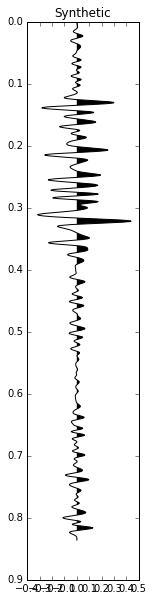

In [6]:
s = w.data['Synthetic']
s.plot()